In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np 
import decimal

In [2]:
Alt=[3500,2800,1300,750,300,900,1800,3100]
Temp1=[10,13,20,25,30,22,18,11]
Temp2=[-15,-11,0,3,10,2,-2,-13]

In [3]:
df = pd.DataFrame({'Altitude':Alt, 'Temperature_ete':Temp1,'Temperature_hiver':Temp2})
df.to_csv('Table.csv', index=False)

In [4]:
df

,Altitude,Temperature_ete,Temperature_hiver
0,3500,10,-15
1,2800,13,-11
2,1300,20,0
3,750,25,3
4,300,30,10
5,900,22,2
6,1800,18,-2
7,3100,11,-13


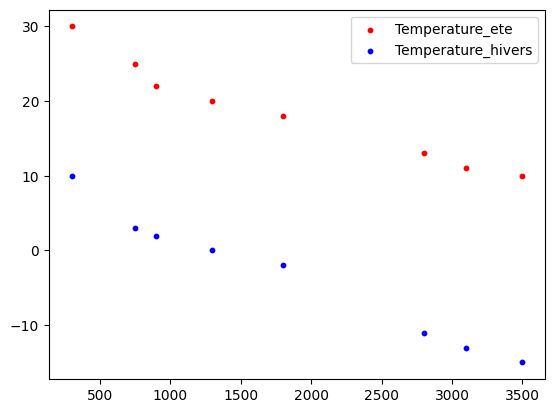

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x=df.Altitude.values
y1=df.Temperature_ete.values
y2=df.Temperature_hiver.values
ax1.scatter(x, y1, s=10, c='r', marker="o", label='Temperature_ete')
ax1.scatter(x, y2, s=10, c='b', marker="o", label='Temperature_hivers')
plt.legend(loc='upper right')
plt.show()

# Methode 1 :Moindres Carres


On dispose de $X$ variable aleatoire des temperatures, et $Y$ la variable aleatoire explicative ,ainsi que 8 realisations (DataFame df) 
Pour chaque relation $i$ on a $ y_i=ax_i+b+e_i$ avec :

$e_i$ : le terme d'erreur

$x_i$ : l'altitude

$y_i$ : La temperature


On recherche $a$,$b$, les estimateurs des Moindres Carres Ordinaires les valeurs minimisant la quantite l’erreur totale:

$Err(a,b)=\sum_{n=1}^{8} {e_i}^2 = \sum_{n=1}^{8} ({y_i-ax_i-b})^2 $
 
le minimum existe pour des valeurs de a et b telle que $grad(Err)=0$ ce qui donne :


 $a=\frac{n \sum_{i=1}^{n} {x_i.y_i} - \sum_{i=1}^{n} {x_i}.\sum_{i=1}^{n} {y_i}}{n.\sum_{i=1}^{n} {x_i^2}-(\sum_{i=1}^{n} {x_i})^2}$
 
$ b=\frac{\sum_{i=1}^{n} {y_i}}{n}-a.\frac{\sum_{i=1}^{n} {x_i}}{n}$

Ayant calcule les parametres avec les donnees (training). On peut utiliser notre modele pour faire de la prediction :

$y = f(x) = ax + b$.



In [6]:
sommex=0
sommex2=0
sommey1=0
sommey2=0
sommexy1=0
sommexy2=0
for alt in Alt:
    sommex=sommex+alt
    sommex2=sommex2+alt**2
for tmp in Temp1:
        sommey1=sommey1+tmp
for tmp in Temp2:
        sommey2=sommey2+tmp
for tmp,alt in zip(Temp1,Alt):
        sommexy1=sommexy1+alt*tmp
for tmp,alt in zip(Temp2,Alt):
        sommexy2=sommexy2+alt*tmp

n=len(Alt)
a1=(n*sommexy1-(sommex*sommey1))/(n*sommex2-(sommex**2))
b1=sommey1/n - a1*(sommex/n)

a2=(n*sommexy2-(sommex*sommey2))/(n*sommex2-(sommex**2))
b2=sommey2/n - a2*(sommex/n)
print(a1,b1)
print(a2,b2)



-0.005772634870992963 29.05182173573104
-0.007324472243940579 9.97982799061767



 
Voici le graphe du resultat :

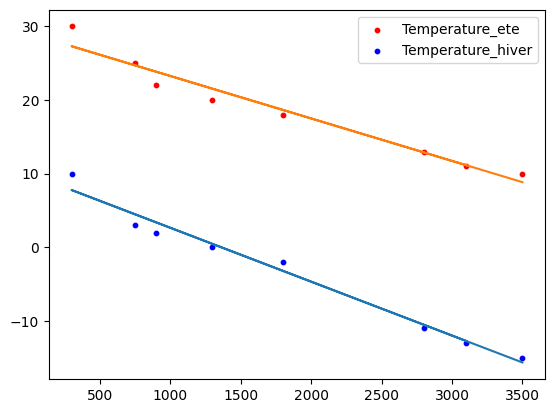

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x=df.Altitude.values
y1=df.Temperature_ete.values
regression_hiver=[a1*x+b1 for x in Alt]
regression_ete=[a1*x+b1 for x in Alt]
ax1.scatter(x, y1, s=10, c='r', marker="o", label='Temperature_ete')
ax1.scatter(x, y2, s=10, c='b', marker="o", label='Temperature_hiver')
plt.plot(x, a2*x+b2)
plt.plot(x, a1*x+b1)
plt.legend(loc='upper right')
plt.show()

# Methode 2 : Maximum de vraisemblance

$min_{a,b,\sigma}L(a,b,\sigma)= \sum_{i=1}^{n} \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_i-ax_i-b}{\sigma})^2}$

Calcul de $\sigma^2=\frac{1}{n}\sum_{i=1}^{n}(y_i-ax_i-b)^2$

In [10]:
sigma1=0
sigma2=0
z1=0
z2=0
for x,y in zip(Alt,Temp1):
    z1=z1+(y-a1*x-b1)**2
for x,y in zip(Alt,Temp2):
    z2=z2+(y-a2*x-b2)**2
sigma1=(z1/len(Alt))**0.5
sigma2=(z2/len(Alt))**0.5
print(sigma1,sigma2)
l1=0
l2=0
for x,y in zip(Alt,Temp1):
    l1=l1+np.exp(-0.5*(((y-a1*x-b1)**2)/sigma1))**22
for x,y in zip(Alt,Temp2):
    l2=l2+np.exp(-0.5*(((y-a2*x-b2)**2)/sigma1))**2
l1=1/((2*np.pi)**0.5*sigma1)*l1
l2=1/((2*np.pi)**0.5*sigma2)*l2
print(l1,l2)

1.36483537686497 1.1958358816429882
0.6699234773617412 1.400597090508421


# Methode 3 :Optimisation

On veux minimiser la valeur de $J(a,b)=\frac{1}{2n}\sum_{i=1}^{n}(ax_i+b-y_i)^2$

In [11]:
def J(X,Y,a,b):
    n=len(X)
    j=0
    for x,y in zip(X,Y):
        j=j+(a*x+b-y)**2
    j=j/(2*n)
    return j

In [12]:
J(Alt,Temp1,a1,b1)

0.9313878029710723

la differentiel de J par rapport a la variable a

In [13]:
def Dja(X,Y,a,b):   
    n=len(X)
    dja=0
    for x,y in zip(X,Y):
        dja=dja+x*(a*x+b-y)
    dja=dja/n
    return dja

In [26]:
Dja(Alt,Temp1,-0.005772634870992963,29.05182173573104)

9.450218385609332e-13

la differentiel de J par rapport a la variable b

In [15]:
def Djb(X,Y,a,b):
    n=len(X)
    djb=0
    for x,y in zip(X,Y):
        djb=djb+a*x+b-y
    djb=djb/n
    return djb

In [27]:
Dja(Alt,Temp1,-0.005772634870992963,29.05182173573104)

9.450218385609332e-13

In [17]:
u=0.5

In [28]:
def gradient(X,Y,u):
    a=0
    b=0
    a1=a-u*Dja(X,Y,a,b)
    b1=b-u*Djb(X,Y,a,b)
    print(a1,b1)
    c=0
    while(abs(J(X,Y,a1,b1)-J(X,Y,a,b))>=np.exp(-3)):
        a_tmp=a1
        b_tmp=b1
        print(u*Dja(X,Y,a_tmp,b_tmp))
        a1=a_tmp-u*Dja(X,Y,a_tmp,b_tmp)
        b1=b_tmp-u*Djb(X,Y,a_tmp,b_tmp)
    return (a1,b1)
        